In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('crop_production.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181162 entries, 0 to 187768
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     181162 non-null  object 
 1   District_Name  181162 non-null  object 
 2   Crop_Year      181162 non-null  int64  
 3   Season         181162 non-null  object 
 4   Crop           181162 non-null  object 
 5   Area           181162 non-null  float64
 6   Production     181162 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.1+ MB


In [51]:
df.describe()

,Crop_Year,Area,Production
count,181162.00,181162.00,181162.00
mean,2005.60,11970.96,736017.08
std,4.92,38879.26,19620366.98
min,1997.00,0.10,0.01
25%,2002.00,100.00,100.00
50%,2006.00,661.00,790.00
75%,2010.00,4680.00,7070.00
max,2015.00,1020181.00,1250800000.00


In [52]:
len(df['State_Name'].unique())

28

In [53]:
len(df['Crop'].unique())

104

In [54]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00


In [55]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df = df[df['Production'] !=0]


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181162 entries, 0 to 187768
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     181162 non-null  object 
 1   District_Name  181162 non-null  object 
 2   Crop_Year      181162 non-null  int64  
 3   Season         181162 non-null  object 
 4   Crop           181162 non-null  object 
 5   Area           181162 non-null  float64
 6   Production     181162 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ MB


In [59]:
df['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [60]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu'], dtype=object)

In [61]:
df['District_Name'].nunique()

518

In [62]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Production'].sort_values(ascending = False)

178273   1250800000.00
178331   1212000000.00
100654   1125000000.00
100612   1063000000.00
100149   1059000000.00
              ...     
122293            0.01
117513            0.01
119440            0.01
112248            0.01
104803            0.01
Name: Production, Length: 181162, dtype: float64

In [63]:
df.loc[178273]

State_Name         Tamil Nadu
District_Name      COIMBATORE
Crop_Year                2011
Season            Whole Year 
Crop                 Coconut 
Area                 82704.00
Production      1250800000.00
Name: 178273, dtype: object

In [64]:
df[df['Area'] == 82704.00]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.00,1250800000.00


In [65]:
no_of_diff_crops = df['Crop'].nunique()
types_of_crops = df['Crop'].unique()

print('There are {} different types of crops'.format(no_of_diff_crops))
print('------------------------------------')
print('They different types of crops are :-',types_of_crops)

There are 104 different types of crops
------------------------------------
They different types of crops are :- ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Beans & Mutter(Vegetable)' 'Bhindi' 'Brinjal'
 'Citrus Fruit' 'Grapes' 'Mango' 'Orange' 'Other Fresh Fruits' 'Papaya'
 'Pome Fruit' 'Tomato' 'Soyabean' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Niger seed'
 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total' 'Jute'
 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannham

In [66]:
df['Season'].value_counts()

Kharif         70394
Rabi           46092
Whole Year     45232
Summer          9572
Winter          5592
Autumn          4280
Name: Season, dtype: int64

In [67]:
crop_data = pd.get_dummies(data=df)

In [68]:
crop_data.head()

,Crop_Year,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.00,2000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.00,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.00,321.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.00,641.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.00,165.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = crop_data.drop('Production',axis=1)
X.head()

,Crop_Year,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y = crop_data['Production']
y.head()

0   2000.00
1      1.00
2    321.00
3    641.00
4    165.00
Name: Production, dtype: float64

In [72]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [73]:
X_test.shape

(59784, 658)

In [74]:
y_test.shape

(59784,)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
crop_model = LinearRegression()

In [77]:
crop_model.fit(X_train,y_train)

LinearRegression()

In [78]:
crop_predictions = crop_model.predict(X_test)
crop_predictions

array([ -322431.7372767 ,   405428.50808191,   571528.05049339, ...,
       -1026232.40209921,   382062.86450776,  -250959.40477229])

In [79]:
crop_model.coef_

array([ 2.75088818e+04,  4.09658208e+01, -1.57810555e+06, -9.19956489e+05,
        4.86817009e+04, -2.15973620e+06, -4.92239824e+05, -5.25280042e+04,
       -4.67064498e+05, -1.23673900e+06, -1.36724950e+06, -1.08324840e+06,
       -1.09989148e+06,  1.18631203e+04, -7.79036341e+05, -1.72940903e+05,
       -3.28625208e+06,  2.56854437e+07, -9.57899765e+05, -1.50365060e+06,
        3.49176463e+05,  4.86872176e+05, -3.97750463e+05, -5.71948784e+05,
       -1.39048510e+05, -4.51173664e+06, -1.56655091e+06, -1.34778881e+06,
       -2.61302591e+05, -6.29371842e+05, -1.29098800e+05, -5.87838374e+04,
       -5.27700247e+05,  4.54246462e+04,  2.35821393e+05, -3.55062754e+05,
       -8.95929330e+06,  2.12644601e+05, -1.58269230e+05,  1.03241388e+05,
       -4.93635335e+05, -5.15190841e+05, -4.35582703e+05,  2.32135086e+05,
       -2.23983816e+06, -3.45561922e+05,  1.81256861e+05,  1.00511241e+05,
        2.07219903e+05, -1.33916784e+05, -1.75181573e+06, -1.13294777e+05,
       -2.41737467e+05, -

In [80]:
crop_model.intercept_

-55168528.39168118

In [81]:
predicted_crop_val = pd.DataFrame({'Actual':y_test,'Predicted':crop_predictions})
predicted_crop_val

,Actual,Predicted
56494,9.00,-322431.74
47692,7.00,405428.51
105868,5041.00,571528.05
23247,11350.00,-5197412.99
138945,50.00,924410.57
...,...,...
71574,484.00,219823.98
59850,2400.00,142157.06
182987,4556.00,-1026232.40
62034,300.00,382062.86


In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [83]:

df['Production'].mean()

736017.0819209325

In [84]:

crop_predictions.mean()

720117.5484147778

In [85]:
mean_absolute_error(y_test,crop_predictions)

2646238.8892113436

In [86]:
mean_squared_error(y_test,crop_predictions)

205688739600500.34

In [87]:
np.sqrt(mean_squared_error(y_test,crop_predictions))

14341852.725519821

In [88]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test,crop_predictions)

9354916.524316628

In [89]:
test_residuals = y_test - crop_predictions


In [90]:
test_residuals

56494     322440.74
47692    -405421.51
105868   -566487.05
23247    5208762.99
138945   -924360.57
            ...    
71574    -219339.98
59850    -139757.06
182987   1030788.40
62034    -381762.86
184880    272062.40
Name: Production, Length: 59784, dtype: float64

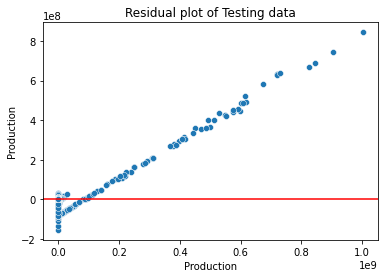

In [91]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual plot of Testing data');


In [92]:
r = r2_score(y_test,crop_predictions)
print("R2score when we predict using Linear Regression is ",r)

R2score when we predict using Linear Regression is  0.09934512526489914


In [93]:
train_set_predictions = crop_model.predict(X_train)
train_set_predictions

array([-1042826.61761464,   471015.52136755, -3668004.94484405, ...,
         794567.63776997,   504581.58531352,  2243924.24045743])

In [94]:
train_set_predictions.mean()

839778.9809248007

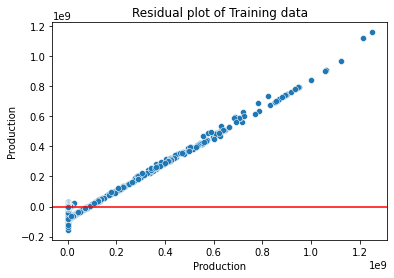

In [95]:
sns.scatterplot(x=y_train,y=y_train-train_set_predictions)
plt.axhline(y=0,color='red')
plt.title('Residual plot of Training data');

In [96]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_train,train_set_predictions)

9930445.296756715

In [97]:
Crop_data2 = df.drop(['District_Name'],axis=1)

In [98]:
Crop_data2.head()

,State_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.00,165.00


In [99]:
crop_data2_ac = pd.get_dummies(data=Crop_data2)
crop_data2_ac.head()


,Crop_Year,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.00,2000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.00,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.00,321.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.00,641.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.00,165.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X2 = crop_data2_ac.drop('Production',axis=1)
X2.head()

,Crop_Year,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
y2 = crop_data2_ac['Production']
y2.head()

0   2000.00
1      1.00
2    321.00
3    641.00
4    165.00
Name: Production, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.33, random_state=42)

In [104]:
from sklearn.linear_model import LinearRegression
crop_model2 = LinearRegression()
crop_model2.fit(X2_train,y2_train)

LinearRegression()

In [105]:
#Prediction
crop2_predictions = crop_model2.predict(X2_test)
crop2_predictions

array([ -73157.54186155,  669049.17291986,  588604.35534453, ...,
       -493611.71710525, -173983.82198057,  326801.26226901])

In [106]:
crop_model2.coef_

array([ 2.57909393e+04,  4.03282022e+01, -1.94159543e+06, -9.84203532e+05,
        2.44618426e+05, -2.20974451e+06, -5.54990577e+05,  3.41116469e+02,
       -7.79026568e+05, -2.41160965e+06, -2.08223295e+06, -9.93818780e+05,
       -1.02652886e+06, -5.92354318e+05, -6.87156662e+05, -5.07125054e+04,
       -2.60347800e+06,  2.62382351e+07, -8.35257041e+05, -1.35634759e+06,
        4.39516892e+05,  5.67840716e+05, -3.42550561e+05, -4.45170808e+05,
       -8.80010751e+04, -4.18993511e+06, -1.56846178e+06, -1.16707870e+06,
       -1.78786166e+05, -4.01511033e+05, -4.39350901e+05,  6.43728635e+05,
        8.64816550e+05,  8.89230776e+05, -7.17802516e+05, -1.24062254e+06,
        3.36835466e+06, -3.03270131e+06,  2.46782759e+05,  3.40510452e+06,
       -5.24362576e+05, -5.20554145e+05,  9.89699927e+04, -2.33914316e+05,
        2.50504675e+06,  1.36938701e+06,  5.31758961e+05, -5.77629050e+06,
        2.83931471e+05,  5.25763862e+05,  1.57845104e+06,  4.59329709e+05,
       -7.11256598e+06,  

In [107]:
crop_model.intercept_

-55168528.39168118

In [108]:
predicted_crop_val2 = pd.DataFrame({'Actual':y2_test,'Predicted':crop2_predictions})
predicted_crop_val2

,Actual,Predicted
56494,9.00,-73157.54
47692,7.00,669049.17
105868,5041.00,588604.36
23247,11350.00,-4658638.52
138945,50.00,911973.74
...,...,...
71574,484.00,109172.82
59850,2400.00,-497445.74
182987,4556.00,-493611.72
62034,300.00,-173983.82


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df['Production'].mean()

736017.0819209325

In [110]:
crop2_predictions.mean()

707856.9694210264

In [111]:
mean_absolute_error(y_test,crop2_predictions)

2486543.1403468153

In [112]:
mean_squared_error(y_test,crop2_predictions)

202722935094206.25

In [113]:
np.sqrt(mean_squared_error(y_test,crop2_predictions))

14238080.456796354

In [114]:
r2_score(y_test,crop2_predictions)

0.1123315740675569

In [115]:
test2_residuals = y2_test - crop2_predictions

In [116]:
test2_residuals

56494      73166.54
47692    -669042.17
105868   -583563.36
23247    4669988.52
138945   -911923.74
            ...    
71574    -108688.82
59850     499845.74
182987    498167.72
62034     174283.82
184880   -305698.26
Name: Production, Length: 59784, dtype: float64

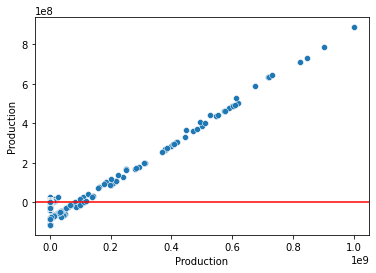

In [117]:
sns.scatterplot(x=y2_test,y=test2_residuals)
plt.axhline(y=0,color='red')
